In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
print(" Info Dataset Train:\n")
print(train_df.info())

 Info Dataset Train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null

In [5]:
print("\nContoh 5 data pertama: \n")
print(train_df.head())


Contoh 5 data pertama: 

   ID    Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
0   1     Martin        727.0     Spain    Male  38.0       2   62276.99   
1   2  Chinweuba        529.0    France  Female  29.0       8       0.00   
2   3      Clapp        589.0    France  Female  50.0       4       0.00   
3   4       Boni        515.0    France    Male  40.0       0  109542.29   
4   5   Jamieson        528.0     Spain    Male  43.0       7   97473.87   

   NumOfProducts HasCrCard IsActiveMember  EstimatedSalary Complain  \
0              1       Yes            Yes         59280.79       No   
1              2       Yes            NaN         19842.11       No   
2              2        No            Yes        182076.97       No   
3              1       Yes            Yes        166370.81       No   
4              2       Yes            Yes        159823.16       No   

   Satisfaction Score Card Type  Point Earned  Exited  
0                   4   DIAMOND   

In [6]:
# Encode categorical variables
label_cols = ["Gender", "HasCrCard", "IsActiveMember", "Complain"]
for col in label_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

In [7]:
# One-hot encoding for Geography and Card Type
train_df = pd.get_dummies(train_df, columns=["Geography", "Card Type"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Geography", "Card Type"], drop_first=True)

In [8]:
# Ensure test set has the same columns as the train set
for col in train_df.columns:
    if col not in test_df.columns:
        test_df[col] = 0  # Add missing columns with default value 0

In [9]:
# Drop unnecessary columns
train_df = train_df.drop(columns=["Surname"])
if "Surname" in test_df.columns:
    test_df = test_df.drop(columns=["Surname"])

In [14]:
# Display correlation with target variable
correlation = train_df.corr()["Exited"].sort_values(ascending=False)
print("\n Korelasi dengan Churn (`Exited`): \n")
print(correlation)


 Korelasi dengan Churn (`Exited`): 

Exited                1.000000
Complain              0.996109
Age                   0.284862
Geography_Germany     0.175472
Balance               0.122083
EstimatedSalary       0.013707
ID                    0.007499
Card Type_PLATINUM    0.000435
Satisfaction Score   -0.003875
Card Type_GOLD       -0.006488
Point Earned         -0.007469
HasCrCard            -0.014530
Tenure               -0.016579
Card Type_SILVER     -0.017983
CreditScore          -0.020400
Geography_Spain      -0.043548
NumOfProducts        -0.048140
Gender               -0.074870
IsActiveMember       -0.138623
Name: Exited, dtype: float64


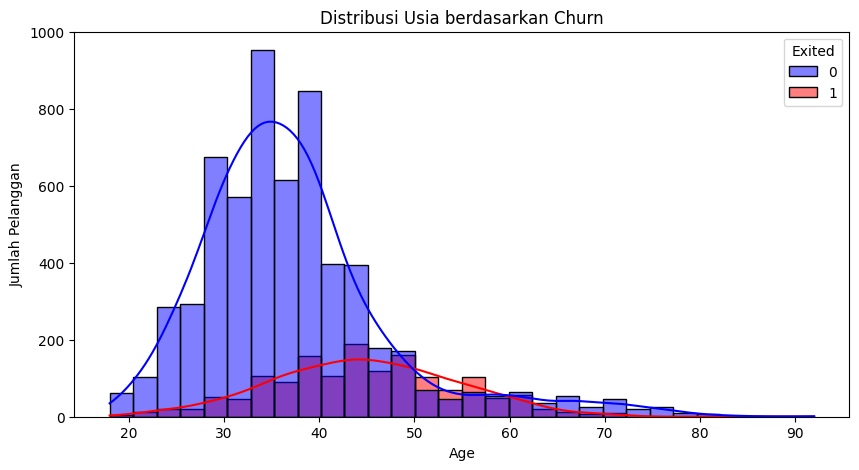

In [15]:
# Plot age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x="Age", hue="Exited", kde=True, bins=30, palette={0: "blue", 1: "red"})
plt.title("Distribusi Usia berdasarkan Churn")
plt.xlabel("Age")
plt.ylabel("Jumlah Pelanggan")
plt.show()

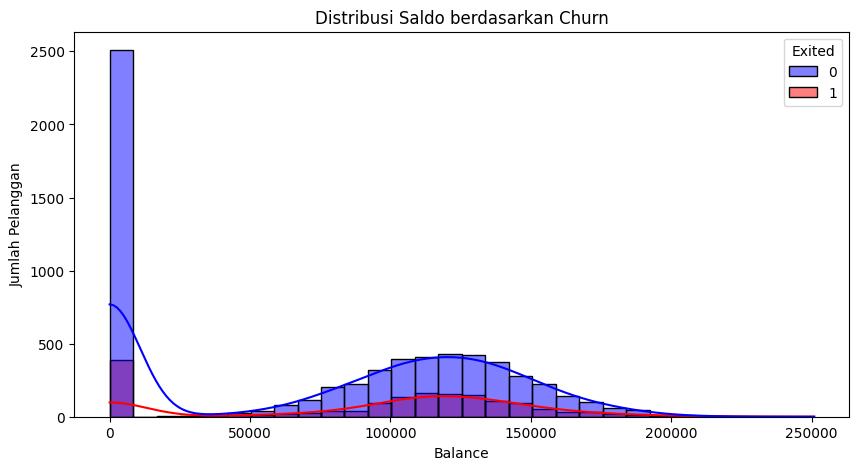

In [16]:
# Plot balance distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x="Balance", hue="Exited", kde=True, bins=30, palette={0: "blue", 1: "red"})
plt.title("Distribusi Saldo berdasarkan Churn")
plt.xlabel("Balance")
plt.ylabel("Jumlah Pelanggan")
plt.show()

In [19]:
# Check missing values
print("\n Missing Values (Train):\n")
print(train_df.isnull().sum())
print("\n Missing Values (Test):\n")
print(test_df.isnull().sum())


 Missing Values (Train):

ID                      0
CreditScore           427
Gender                  0
Age                   442
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary       366
Complain                0
Satisfaction Score      0
Point Earned            0
Exited                  0
Geography_Germany       0
Geography_Spain         0
Card Type_GOLD          0
Card Type_PLATINUM      0
Card Type_SILVER        0
dtype: int64

 Missing Values (Test):

ID                    0
CreditScore           0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Point Earned          0
Geography_Germany     0
Geography_Spain       0
Card Type_GOLD        0
Card Type_PLATINUM    0
Card Type_SILVER      0
Exited  

In [20]:
# Check duplicates
print("\n Jumlah Data Duplikat (Train):", train_df.duplicated().sum())
print(" Jumlah Data Duplikat (Test):", test_df.duplicated().sum())


 Jumlah Data Duplikat (Train): 0
 Jumlah Data Duplikat (Test): 0


In [21]:
# Define features and target variable
X = train_df.drop(["Exited", "ID"], axis=1)  # Drop ID column
y = train_df["Exited"]

In [22]:
# Prepare test set
X_test = test_df.drop(["ID"], axis=1)

In [23]:
# Split data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
print("\n Data telah dibagi menjadi Training dan Validation Set!")
print(f"Jumlah data Training: {X_train.shape[0]}")
print(f"Jumlah data Validation: {X_val.shape[0]}")


 Data telah dibagi menjadi Training dan Validation Set!
Jumlah data Training: 6424
Jumlah data Validation: 1606


In [25]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Predict on validation set
y_pred_val = rf_model.predict(X_val)

In [27]:
# Evaluate model
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
conf_matrix = confusion_matrix(y_val, y_pred_val)

In [30]:
print(f"\n Model Evaluation:")
print(f" F1-Score: {f1:.4f}")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")


 Model Evaluation:
 F1-Score: 0.9953
 Accuracy: 0.9981
 Precision: 0.9907
 Recall: 1.0000
